       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome V

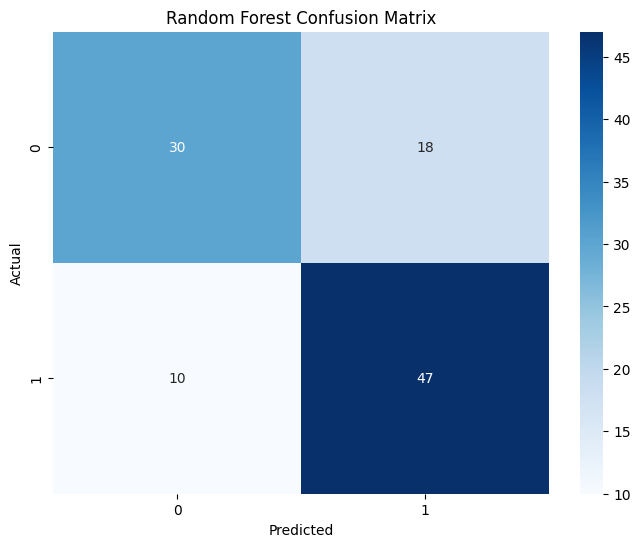

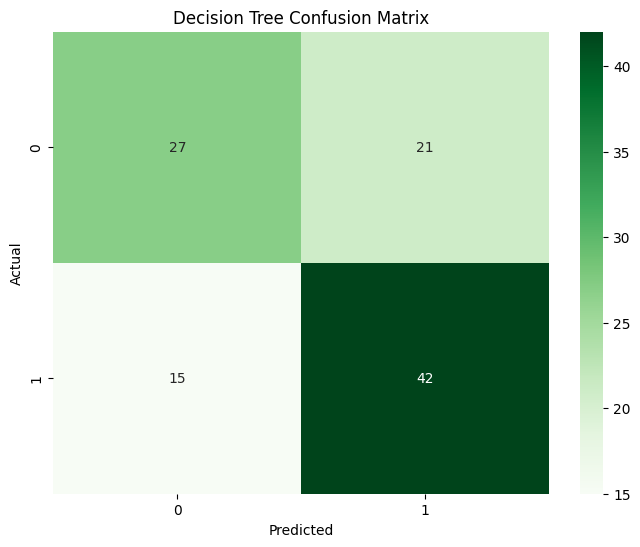

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = '/content/Disease_symptom_and_patient_profile_dataset.csv'  # Use the correct file path for your dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()

# Iterate over all columns and apply label encoding where necessary
for col in df.columns:
    if df[col].dtype == 'object':  # If the column is of type 'object' (i.e., categorical)
        df[col] = label_encoder.fit_transform(df[col])

# Now the dataset should be numeric
print(df.head())  # Display the first few rows to verify

# Split the data into features (X) and target (y)
X = df.drop(columns=['Outcome Variable'])  # Replace 'Outcome Variable' with your target column name
y = df['Outcome Variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate Random Forest Model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Evaluate Decision Tree Model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix for both models
rf_cm = confusion_matrix(y_test, y_pred_rf)
dt_cm = confusion_matrix(y_test, y_pred_dt)

# Plotting confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Columns in the dataset:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

Recommended Diet Plan:
                                                  food  Caloric Value   Fat  \
17                                      gjetost cheese           1058  67.0   
34                                      pimento cheese            525  43.7   
47                                       cheese spread            708  68.6   
64                             quesadilla with chick

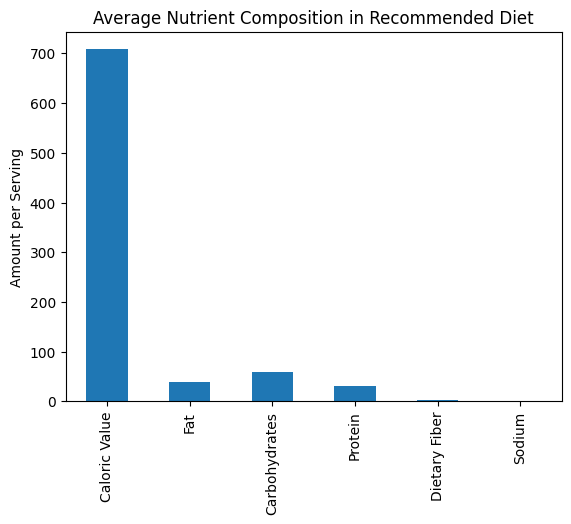

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
url = '/FOOD-DATA-GROUP1.csv'  # Replace with the actual path or load from your source
food_data = pd.read_csv(url)

# Step 3: Explore the Dataset
print("Columns in the dataset:")
print(food_data.columns)

# Step 4: Preprocess the Dataset
# Selecting relevant nutrient columns
nutrient_columns = ['Caloric Value', 'Fat', 'Carbohydrates', 'Protein', 'Dietary Fiber', 'Sodium']

# Drop rows with missing values in these columns
food_data_clean = food_data.dropna(subset=nutrient_columns)

# Step 5: Scale the nutrient data
scaler = StandardScaler()
scaled_nutrients = scaler.fit_transform(food_data_clean[nutrient_columns])

# Step 6: Apply K-Means Clustering to Suggest a Diet Plan
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose 5 clusters as an example
food_data_clean['Cluster'] = kmeans.fit_predict(scaled_nutrients)

# Step 7: Create a Diet Plan based on Clustering
target_cluster = 2  # Example: Target cluster for diet recommendation
diet_plan = food_data_clean[food_data_clean['Cluster'] == target_cluster]

# Display the recommended diet plan
print("\nRecommended Diet Plan:")
print(diet_plan[['food'] + nutrient_columns])

# Step 8: Visualize the Average Nutrient Composition in the Recommended Diet Plan
diet_plan[nutrient_columns].mean().plot(kind='bar')
plt.title("Average Nutrient Composition in Recommended Diet")
plt.ylabel("Amount per Serving")
plt.show()


Random Forest Disease Model Accuracy: 0.7333333333333333
Disease Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68        48
           1       0.72      0.82      0.77        57

    accuracy                           0.73       105
   macro avg       0.74      0.72      0.73       105
weighted avg       0.74      0.73      0.73       105


Recommended Diet Plan:
                                                  food  Caloric Value   Fat  \
17                                      gjetost cheese           1058  67.0   
34                                      pimento cheese            525  43.7   
47                                       cheese spread            708  68.6   
64                             quesadilla with chicken            529  27.5   
66                                    kung pao chicken            779  42.2   
83                                       lemon chicken           1440  74.9   
1

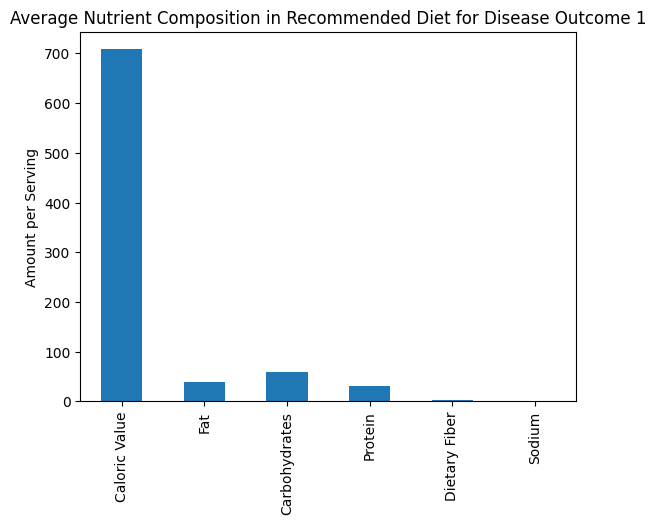

In [ ]:
# Step 1: Import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1: Disease Symptom Model

# Step 2: Load the disease dataset
disease_url = '/Disease_symptom_and_patient_profile_dataset.csv'
df_disease = pd.read_csv(disease_url)

# Step 3: Preprocess the disease dataset
df_disease = df_disease.dropna()
label_encoder = LabelEncoder()

for col in df_disease.columns:
    if df_disease[col].dtype == 'object':
        df_disease[col] = label_encoder.fit_transform(df_disease[col])

# Assuming 'Outcome Variable' is the target column for disease prediction
X_disease = df_disease.drop(columns=['Outcome Variable'])
y_disease = df_disease['Outcome Variable']

# Step 4: Split the data for disease classification
X_train_disease, X_test_disease, y_train_disease, y_test_disease = train_test_split(X_disease, y_disease, test_size=0.3, random_state=42)

# Step 5: Train the Random Forest model
rf_model_disease = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_disease.fit(X_train_disease, y_train_disease)

# Step 6: Predict the outcome of the disease model
y_pred_disease_rf = rf_model_disease.predict(X_test_disease)

# Step 7: Evaluate the model
print("Random Forest Disease Model Accuracy:", accuracy_score(y_test_disease, y_pred_disease_rf))
print("Disease Model Classification Report:\n", classification_report(y_test_disease, y_pred_disease_rf))

# Part 2: Diet Clustering Model

# Step 8: Load the food dataset for diet clustering
food_url = '/FOOD-DATA-GROUP1.csv'
food_data = pd.read_csv(food_url)

# Step 9: Preprocess the food dataset
nutrient_columns = ['Caloric Value', 'Fat', 'Carbohydrates', 'Protein', 'Dietary Fiber', 'Sodium']
food_data_clean = food_data.dropna(subset=nutrient_columns)

# Step 10: Scale the nutrient data for clustering
scaler = StandardScaler()
scaled_nutrients = scaler.fit_transform(food_data_clean[nutrient_columns])

# Step 11: Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
food_data_clean['Cluster'] = kmeans.fit_predict(scaled_nutrients)

# Function to suggest a diet based on a cluster
def suggest_diet(cluster_number):
    diet_plan = food_data_clean[food_data_clean['Cluster'] == cluster_number]
    print("\nRecommended Diet Plan:")
    print(diet_plan[['food'] + nutrient_columns])
    return diet_plan

# Part 3: Merging the Models

# Example: Based on the disease outcome, we map it to a diet cluster
# Assuming you define a mapping from a disease outcome to a diet cluster
disease_to_diet_mapping = {
    0: 1,  # Disease 0 -> Diet Cluster 1
    1: 2,  # Disease 1 -> Diet Cluster 2
    2: 3,  # Disease 2 -> Diet Cluster 3
    3: 4,  # Disease 3 -> Diet Cluster 4
    4: 0   # Disease 4 -> Diet Cluster 0
}

# Step 12: Predict a disease for a test case
# Get the predicted disease for the first test case as an example
predicted_disease = y_pred_disease_rf[0]

# Step 13: Suggest a diet based on the predicted disease outcome
diet_cluster = disease_to_diet_mapping[predicted_disease]
suggested_diet_plan = suggest_diet(diet_cluster)

# Step 14: Optionally visualize the diet
suggested_diet_plan[nutrient_columns].mean().plot(kind='bar')
plt.title(f"Average Nutrient Composition in Recommended Diet for Disease Outcome {predicted_disease}")
plt.ylabel("Amount per Serving")
plt.show()


<ipython-input-7-842b375f505e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(disease_to_diet.keys()), y=list(disease_to_diet.values()), palette="muted")


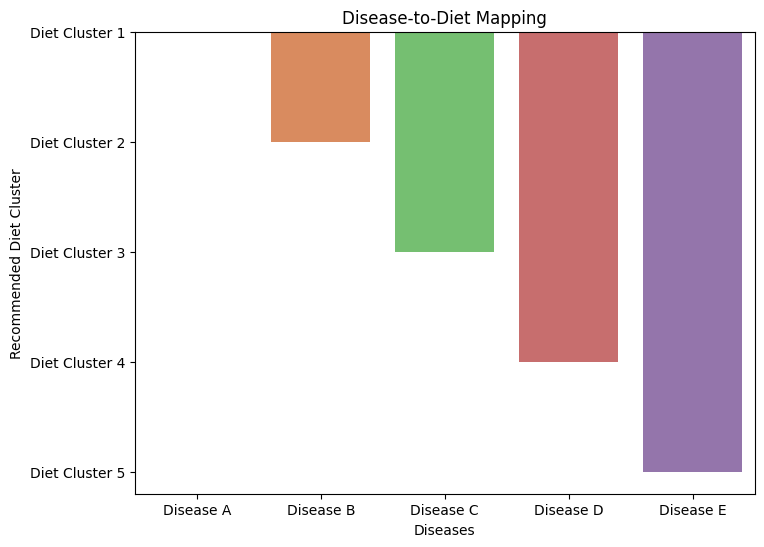

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data to visualize disease-to-diet mapping
diseases = ['Disease A', 'Disease B', 'Disease C', 'Disease D', 'Disease E']
diet_clusters = ['Diet Cluster 1', 'Diet Cluster 2', 'Diet Cluster 3', 'Diet Cluster 4', 'Diet Cluster 5']

# Mapping (You can customize this according to your actual mapping)
disease_to_diet = {
    'Disease A': 'Diet Cluster 1',
    'Disease B': 'Diet Cluster 2',
    'Disease C': 'Diet Cluster 3',
    'Disease D': 'Diet Cluster 4',
    'Disease E': 'Diet Cluster 5'
}

# Create a bar plot showing the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x=list(disease_to_diet.keys()), y=list(disease_to_diet.values()), palette="muted")
plt.title('Disease-to-Diet Mapping')
plt.xlabel('Diseases')
plt.ylabel('Recommended Diet Cluster')
plt.show()


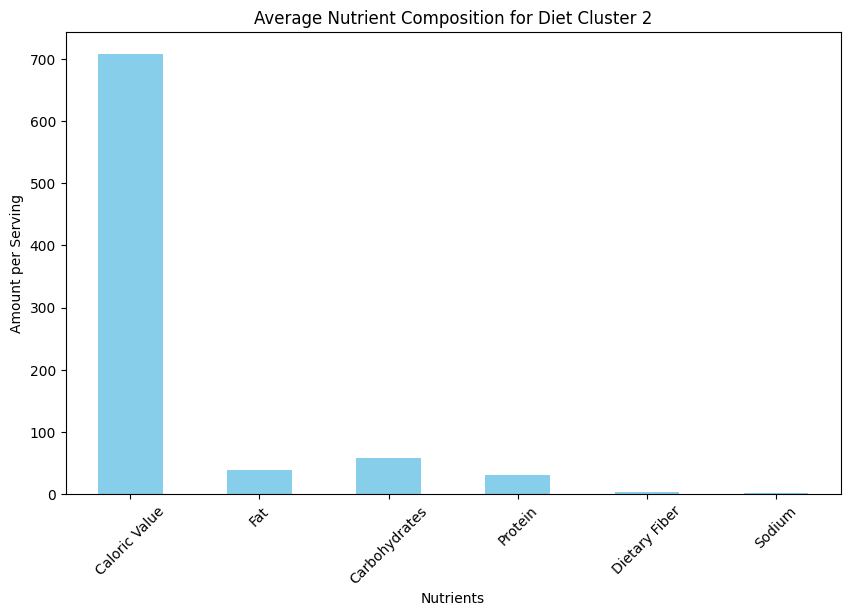

In [ ]:
# Plot the average nutrient composition for the recommended diet
diet_plan_avg_nutrients = suggested_diet_plan[nutrient_columns].mean()

plt.figure(figsize=(10, 6))
diet_plan_avg_nutrients.plot(kind='bar', color='skyblue')
plt.title(f"Average Nutrient Composition for Diet Cluster {diet_cluster}")
plt.xlabel('Nutrients')
plt.ylabel('Amount per Serving')
plt.xticks(rotation=45)
plt.show()


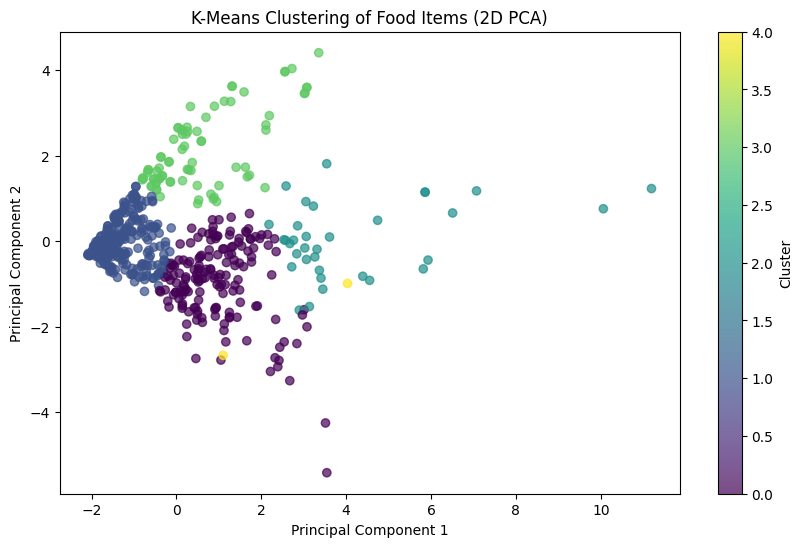

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization of clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_nutrients)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=food_data_clean['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering of Food Items (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from graphviz import Digraph

# Create a flowchart using Graphviz
dot = Digraph()

# Adding nodes
dot.node('A', 'Input Symptoms')
dot.node('B', 'Disease Prediction Model (Random Forest)')
dot.node('C', 'Predicted Disease')
dot.node('D', 'Diet Recommendation (K-Means Clustering)')
dot.node('E', 'Recommended Diet Plan')

# Adding edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')

# Render the flowchart
dot.render('disease_to_diet_flowchart', format='png', view=True)


'disease_to_diet_flowchart.png'

In [ ]:
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install graphviz

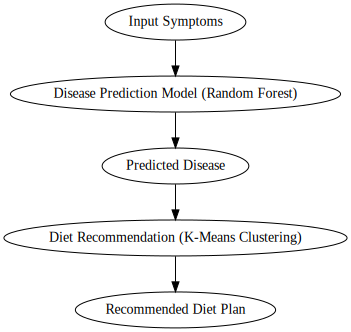

In [ ]:
from graphviz import Digraph
from IPython.display import display, SVG

# Create a flowchart using Graphviz
dot = Digraph(format='svg')  # Specify SVG format for inline rendering

# Adding nodes
dot.node('A', 'Input Symptoms')
dot.node('B', 'Disease Prediction Model (Random Forest)')
dot.node('C', 'Predicted Disease')
dot.node('D', 'Diet Recommendation (K-Means Clustering)')
dot.node('E', 'Recommended Diet Plan')

# Adding edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')

# Render and display the flowchart inline in the notebook
display(SVG(dot.pipe()))  # Use pipe() to render and display SVG directly in the notebook


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load your dataset (assuming it has symptom data and disease outcome)
df = pd.read_csv('/content/DiseaseAndSymptoms.csv')

# Apply Label Encoding to categorical columns (e.g., symptoms and disease)
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # Convert only categorical columns
        df[column] = label_encoder.fit_transform(df[column])

# Separate features and target
features = df.drop(columns=['Disease'])  # All columns except the disease outcome
target = df['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Model predictions for the disease condition based on symptoms
y_pred = clf.predict(X_test)

# Output the classification report for disease prediction
print("Disease Condition Prediction Report")
print(classification_report(y_test, y_pred))


Disease Condition Prediction Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00  

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  Diet  Sleep_Hours  \
0            Low            Normal         Positive     7            5   
1         Normal            Normal         Negative     4            9   
2         Normal            Normal         Negative     8            6   
3         Normal            Normal         Positive     5            4   
4         Normal            Normal         Positive     7            5   

   Stress_Level  Caffeine_Intake  
0             3                4  
1             5                4  
2             9  

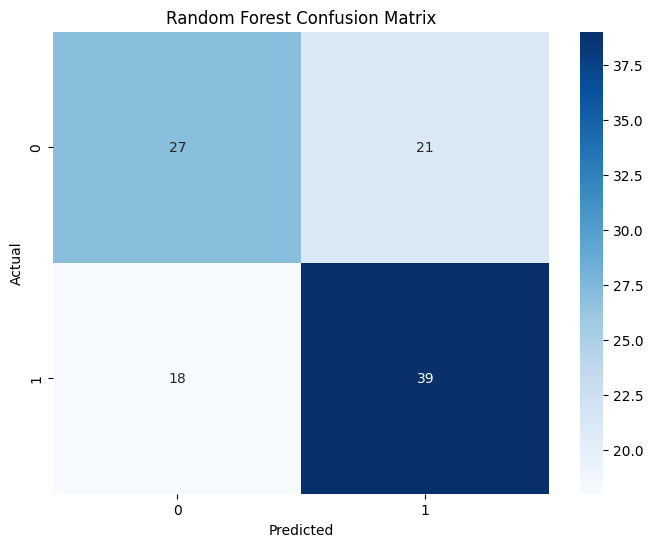

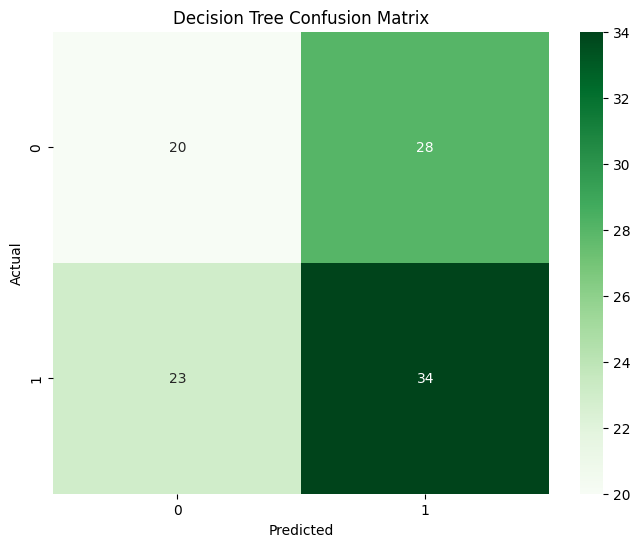

Linear Regression Coefficients: [-0.00977318  0.01411388  0.00849821 -0.06430692]
Linear Regression Intercept: 0.5611078164388447


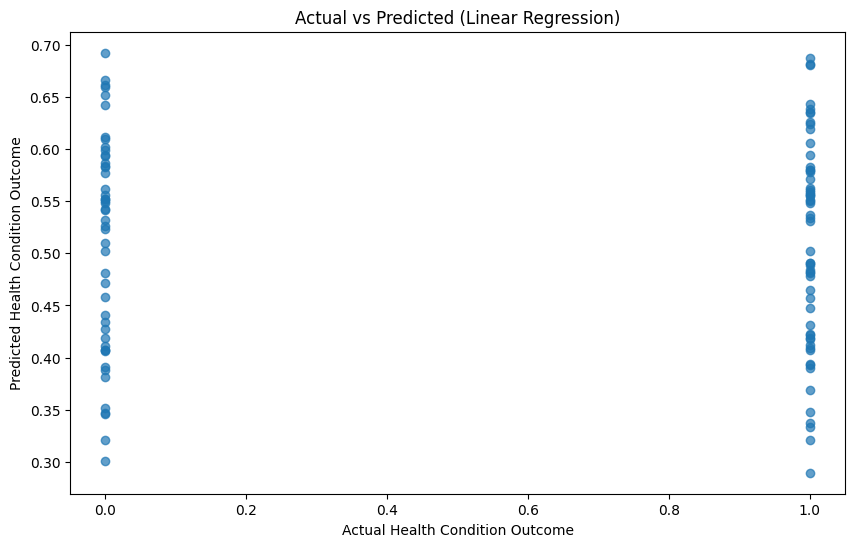

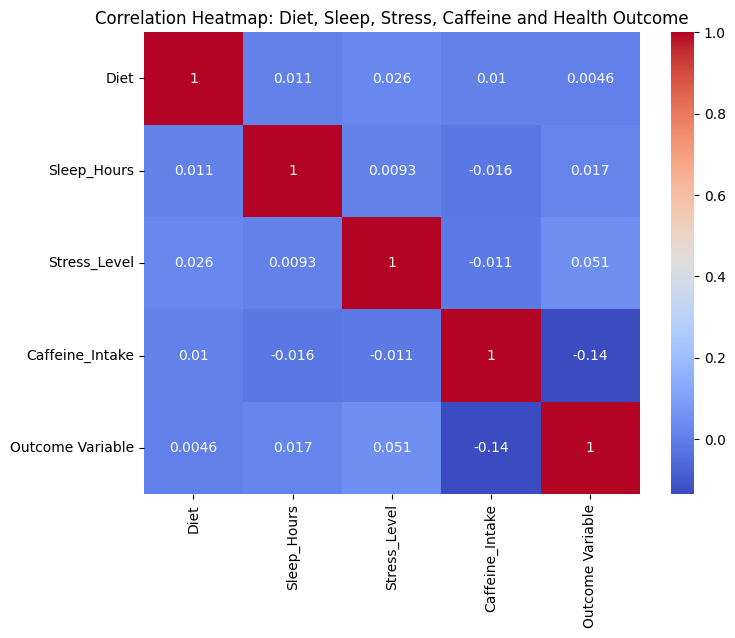

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = '/content/Disease_symptom_and_patient_profile_dataset.csv'  # Use the correct file path for your dataset
df = pd.read_csv(url)

# Add new columns for Diet, Sleep, Stress, and Caffeine Intake (Simulated data)
# For example, assuming values between 1-10 for simplicity
np.random.seed(42)  # Ensure reproducibility
df['Diet'] = np.random.randint(1, 11, df.shape[0])  # 1-10 scale for diet quality
df['Sleep_Hours'] = np.random.randint(4, 10, df.shape[0])  # Sleep hours per day
df['Stress_Level'] = np.random.randint(1, 11, df.shape[0])  # 1-10 scale for stress level
df['Caffeine_Intake'] = np.random.randint(0, 5, df.shape[0])  # Cups of coffee per day

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()

# Iterate over all columns and apply label encoding where necessary
for col in df.columns:
    if df[col].dtype == 'object':  # If the column is of type 'object' (i.e., categorical)
        df[col] = label_encoder.fit_transform(df[col])

# Now the dataset should be numeric
print(df.head())  # Display the first few rows to verify

### Part 1: Symptom-to-Condition Mapping (Classification)
# Split the data into features (X) and target (y)
X_classification = df.drop(columns=['Outcome Variable'])  # Features for classification (Exclude target column)
y_classification = df['Outcome Variable']  # Target for classification

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_class, y_train_class)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_class, y_train_class)

# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test_class)

# Predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test_class)

# Evaluate Random Forest Model
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_class, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test_class, y_pred_rf))

# Evaluate Decision Tree Model
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test_class, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test_class, y_pred_dt))

# Confusion matrix for both models
rf_cm = confusion_matrix(y_test_class, y_pred_rf)
dt_cm = confusion_matrix(y_test_class, y_pred_dt)

# Plotting confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Part 2: Diet & Sleep Impact Analysis (Regression)
# Define the features for regression (Diet, Sleep, Stress, and Caffeine)
X_regression = df[['Diet', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake']]  # Independent variables
y_regression = df['Outcome Variable']  # Dependent variable (health condition outcome)

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)

# Predictions using Linear Regression
y_pred_lr = lr_model.predict(X_test_reg)

# Evaluate the model
print("Linear Regression Coefficients:", lr_model.coef_)
print("Linear Regression Intercept:", lr_model.intercept_)

# Visualizing the actual vs predicted for Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_lr, alpha=0.7)
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Health Condition Outcome')
plt.ylabel('Predicted Health Condition Outcome')
plt.show()

# You can also analyze the relationship between diet, sleep, stress, and health conditions here.
# For example, correlation heatmap between the added variables and health outcomes
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Diet', 'Sleep_Hours', 'Stress_Level', 'Caffeine_Intake', 'Outcome Variable']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Diet, Sleep, Stress, Caffeine and Health Outcome')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data, adjust as needed
data = {
    'Disease': ['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Asthma',
                'Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Asthma'],
    'Fever': [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
    'Cough': [0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    'Fatigue': [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
    'Difficulty Breathing': [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
    'Age': [19, 25, 25, 25, 25, 19, 25, 25, 25, 25],
    'Gender': [0, 0, 0, 1, 1, 0, 0, 0, 1, 1],  # Convert to numerical
    'Blood Pressure': ['Low', 'Normal', 'Normal', 'Normal', 'Normal',
                       'Low', 'Normal', 'Normal', 'Normal', 'Normal'],
    'Cholesterol Level': ['Normal', 'Normal', 'Normal', 'Normal', 'Normal',
                          'Normal', 'Normal', 'Normal', 'Normal', 'Normal'],
    'Outcome Variable': [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
    'Diet': [7, 4, 8, 5, 7, 6, 4, 7, 5, 7],
    'Sleep_Hours': [5, 9, 6, 4, 5, 5, 9, 6, 4, 5],
    'Stress_Level': [3, 5, 9, 2, 10, 4, 5, 8, 2, 9],
    'Caffeine_Intake': [4, 4, 3, 3, 4, 4, 4, 3, 3, 4],
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical
df['Blood Pressure'] = df['Blood Pressure'].map({'Low': 0, 'Normal': 1})
df['Cholesterol Level'] = df['Cholesterol Level'].map({'Normal': 1})

# Features and target variable
X = df[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender']]
y = df['Outcome Variable']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Test the model
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Classification report
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Mapping from numeric predictions to disease names
disease_mapping = {
    0: 'Common Cold',
    1: 'Influenza',
    2: 'Eczema',
    3: 'Asthma',
}

# Function to predict disease based on user symptoms
def predict_disease(symptoms):
    # Convert symptoms to DataFrame
    symptoms_df = pd.DataFrame([symptoms])
    prediction = rf_model.predict(symptoms_df)

    # Map prediction to disease
    if prediction[0] == 0:
        return 'Common Cold'
    elif prediction[0] == 1:
        return 'Influenza'
    elif prediction[0] == 2:
        return 'Eczema'
    elif prediction[0] == 3:
        return 'Asthma'
    else:
        return "Unknown Disease"

# Function to suggest diet, sleep, stress, and caffeine intake
def suggestions(disease):
    suggestions_dict = {
        'Influenza': {'Diet': 7, 'Sleep_Hours': 8, 'Stress_Level': 2, 'Caffeine_Intake': 1},
        'Common Cold': {'Diet': 4, 'Sleep_Hours': 9, 'Stress_Level': 4, 'Caffeine_Intake': 2},
        'Eczema': {'Diet': 8, 'Sleep_Hours': 7, 'Stress_Level': 6, 'Caffeine_Intake': 3},
        'Asthma': {'Diet': 5, 'Sleep_Hours': 6, 'Stress_Level': 5, 'Caffeine_Intake': 1},
    }
    return suggestions_dict.get(disease, "No suggestions available.")

# Example usage
user_symptoms = {'Fever': 1, 'Cough': 0, 'Fatigue': 1, 'Difficulty Breathing': 1, 'Age': 25, 'Gender': 1}
predicted_disease = predict_disease(user_symptoms)
print("Predicted Disease:", predicted_disease)

# Get suggestions based on the predicted disease
diet_suggestions = suggestions(predicted_disease)
print("Suggestions for Diet, Sleep, Stress, and Caffeine Intake:", diet_suggestions)
#DATA IS OVERFITT


Random Forest Classifier Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted Disease: Influenza
Suggestions for Diet, Sleep, Stress, and Caffeine Intake: {'Diet': 7, 'Sleep_Hours': 8, 'Stress_Level': 2, 'Caffeine_Intake': 1}


In [ ]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight

# Load the Dataset
url = '/content/training_data.csv'  # Replace with your dataset URL or local path
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Drop the 'Unnamed: 133' column if it is unnecessary
data = data.drop(columns=['Unnamed: 133'], errors='ignore')

# Check for missing values again
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values or drop them
data = data.dropna()  # Dropping rows with missing values; you can adjust this as needed

# Encode categorical variables (e.g., for the prognosis column)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the transformed data
print("\nTransformed Data:")
print(data.head())

# Define features and target variable
X = data.drop(['prognosis'], axis=1)  # Use 'prognosis' as the target variable
y = data['prognosis']

# Handle class imbalance using class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(zip(np.unique(y), class_weights))

# Check if X is empty
if X.empty:
    print("Feature DataFrame X is empty. Please check the dataset and preprocessing steps.")
else:
    # Split the dataset into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize the Random Forest Classifier
    model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)

    # Set the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=StratifiedKFold(n_splits=5),
                               n_jobs=-1, verbose=1)

    # Train the model with the best parameters found
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Output the results
    print(f"\nRandom Forest Classifier Accuracy: {accuracy}")
    print("\nRandom Forest Classification Report:")
    print(report)

    # Example prediction using an actual test sample
    sample_index = 0  # Change this index to use different test samples
    sample_input = X_test.iloc[sample_index].values.reshape(1, -1)
    sample_pred = best_model.predict(sample_input)
    print(f"\nPrediction for sample {sample_index}: {sample_pred}")


Dataset Head:
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...       0.0   
1       0           0             0        0                 0  ...       0.0   
2       0           0             0        0                 0  ...       0.0   
3       0           0             0        0                 0  ...       0.0   
4       0           0             0        0                 0  ...       0.0   

   skin_peeling  silver_

NameError: name 'np' is not defined

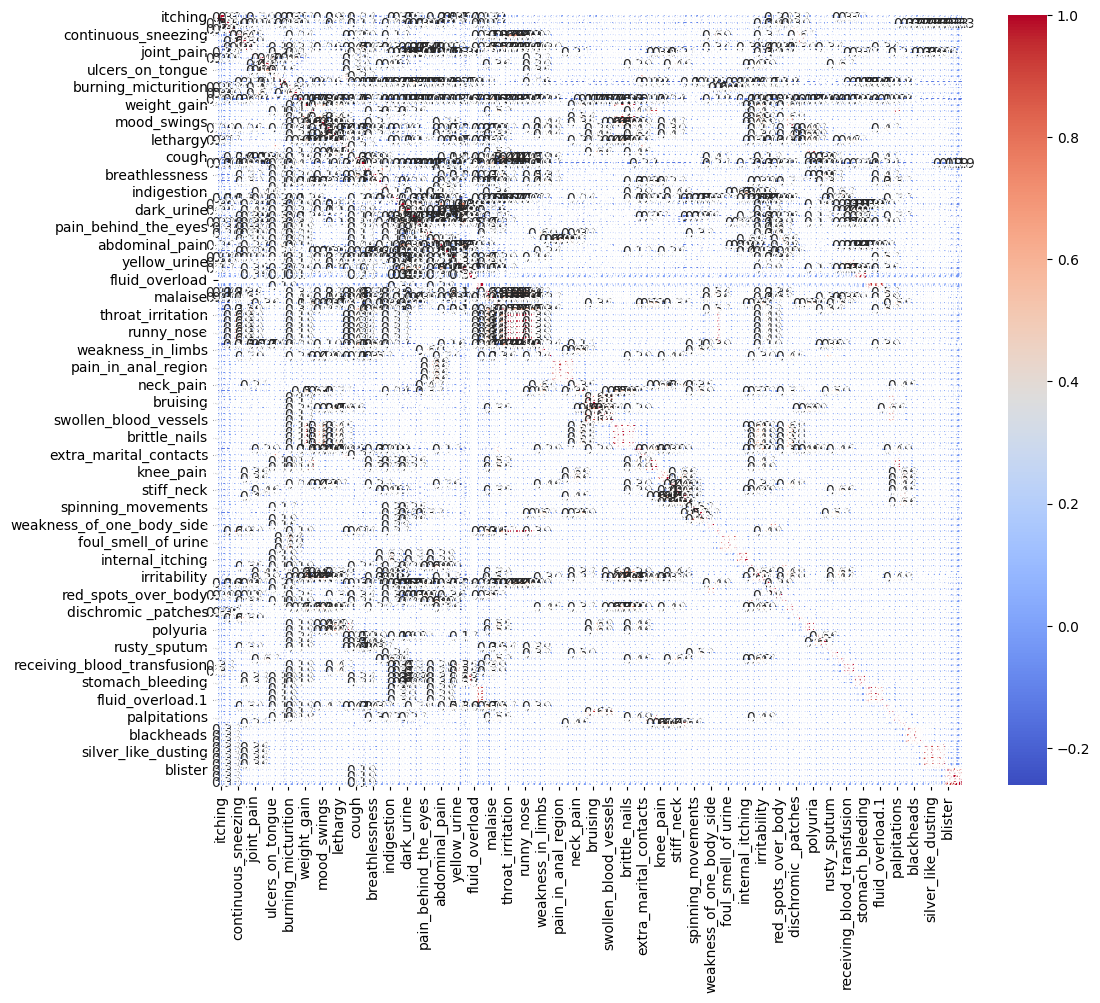

Highly correlated columns to drop:
['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated columns to drop:")
print(to_drop)

In [ ]:
X_reduced = X.drop(columns=['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose',
                            'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus',
                            'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
                            'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
                            'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness',
                            'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching',
                            'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite',
                            'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections',
                            'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption',
                            'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking',
                            'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
                            'red_sore_around_nose', 'yellow_crust_ooze'])

# Print the reduced dataset shape to confirm
print(X_reduced.shape)

(4920, 90)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

from sklearn.model_selection import train_test_split

# Assuming 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

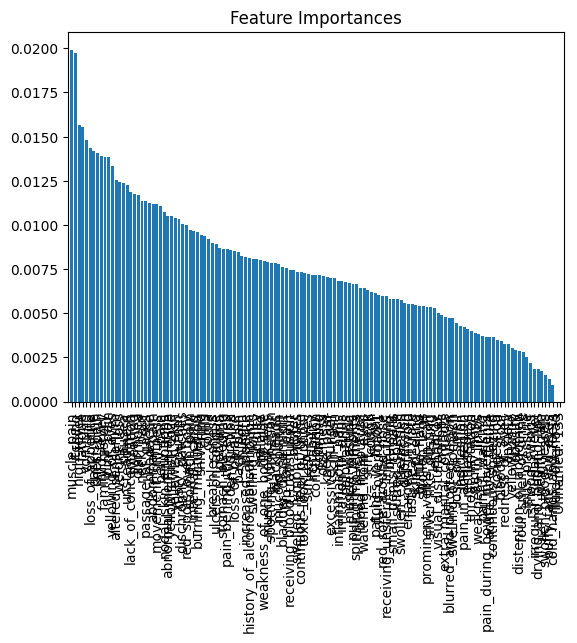

FileNotFoundError: [Errno 2] No such file or directory: 'diet_sleep_data.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Symptom-to-Condition Mapping

# Load the dataset for symptom-to-condition mapping
# Ensure your dataset has the correct structure
data = pd.read_csv('/content/training_data.csv')

# Display the first few rows of the data to understand its structure
print(data.head())

# Check the column names to ensure they match what you expect
print("Column names:", data.columns)

# Define features and target
# Here 'prognosis' is assumed to be the target variable (health condition)
# Change 'symptom1', 'symptom2', ..., 'symptomN' to your actual symptom columns
X = data.drop('prognosis', axis=1)  # Features (symptoms)
y = data['prognosis']  # Target (health condition)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Symptom-to-Condition Mapping")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Accuracy after Grid Search:", accuracy_score(y_test, y_pred_best))

# Feature Importance Visualization
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 2. Diet & Sleep Impact Analysis

# Load the dataset for diet and lifestyle impact analysis
# Ensure it has the required features
regression_data = pd.read_csv('diet_sleep_data.csv')

# Display the first few rows to understand its structure
print(regression_data.head())

# Define features and target for regression
# Replace 'diet_score', 'caffeine_intake', 'sleep_hours', 'stress_level', and 'health_outcome'
# with your actual column names
X_reg = regression_data[['diet_score', 'caffeine_intake', 'sleep_hours', 'stress_level']]  # Features
y_reg = regression_data['health_outcome']  # Target variable

# Split the dataset
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_reg = regressor.predict(X_test_reg)
print("\nDiet & Sleep Impact Analysis")
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))

# Optional: Visualize predicted vs actual values
plt.figure()
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Health Outcome")
plt.show()


Test Accuracy: 1.00
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.00
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      

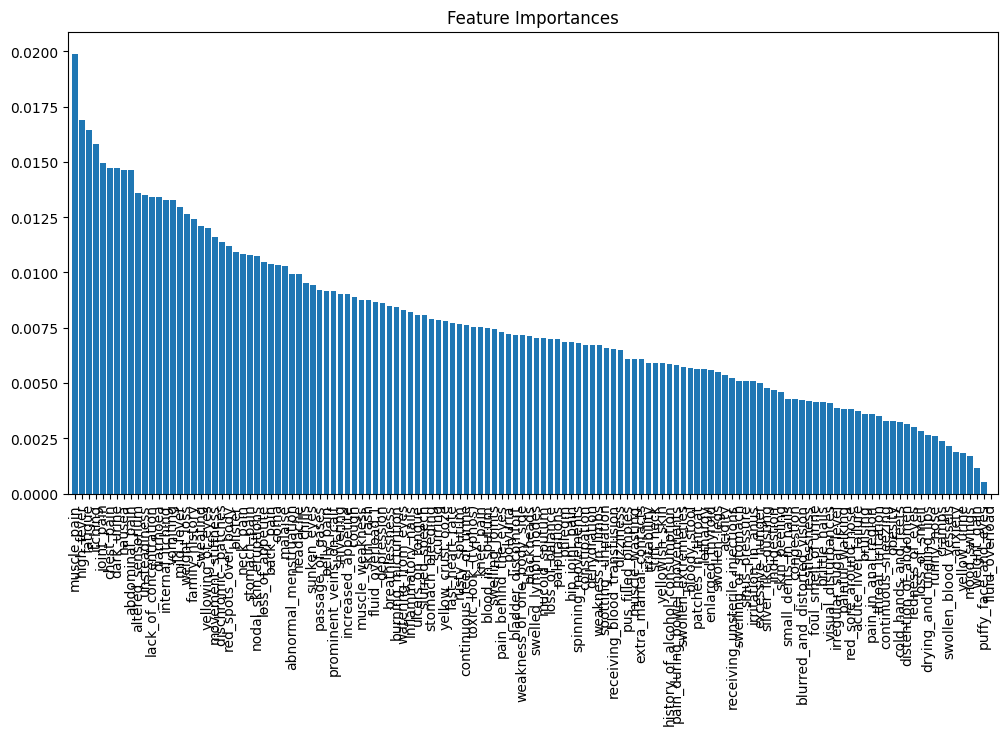

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset (adjust the path and filename as necessary)
data = pd.read_csv('/content/training_data.csv')

# Prepare features and target variable
X = data.drop(['prognosis', 'Unnamed: 133'], axis=1)  # Features
y = data['prognosis']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Optional: Feature Importance
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Non-numeric columns: Index(['prognosis'], dtype='object')
Encoded 'prognosis' values: [15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]
Correlation with prognosis:
prognosis               1.000000
diarrhoea               0.285993
joint_pain              0.226410
dark_urine              0.183561
fatigue                 0.157657
vomiting                0.147986
constipation            0.093152
weight_gain             0.078099
muscle_pain             0.073006
anxiety                 0.065083
nausea                  0.062665
high_fever              0.040082
headache                0.017376
yellowish_skin          0.010079
yellow_urine           -0.013017
dehydration            -0.037984
nodal_skin_eruptions   -0.063307
stomach_pain           -0.091363
skin_rash              -0.146564
itching                -0.151898
shivering              -0.202584
continuous_sneezing    -0.237346
Name: prognosis, dtype: float64
De

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.77      0.93      0.84        46
           2       0.89      0.96      0.93        52
           3       1.00      0.98      0.99        55
           4       1.00      1.00      1.00        41
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        52
           7       0.26      1.00      0.42        45
           8       1.00      1.00      1.00        45
           9       1.00      1.00      1.00        47
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        58
          12       0.43      0.98      0.60        41
          13       1.00      0.93      0.96        54
          14       0.89      1.00      0.94        48
          15       1.00      0.88      0.93        49
          16       1.00      0.94      0.97        50
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


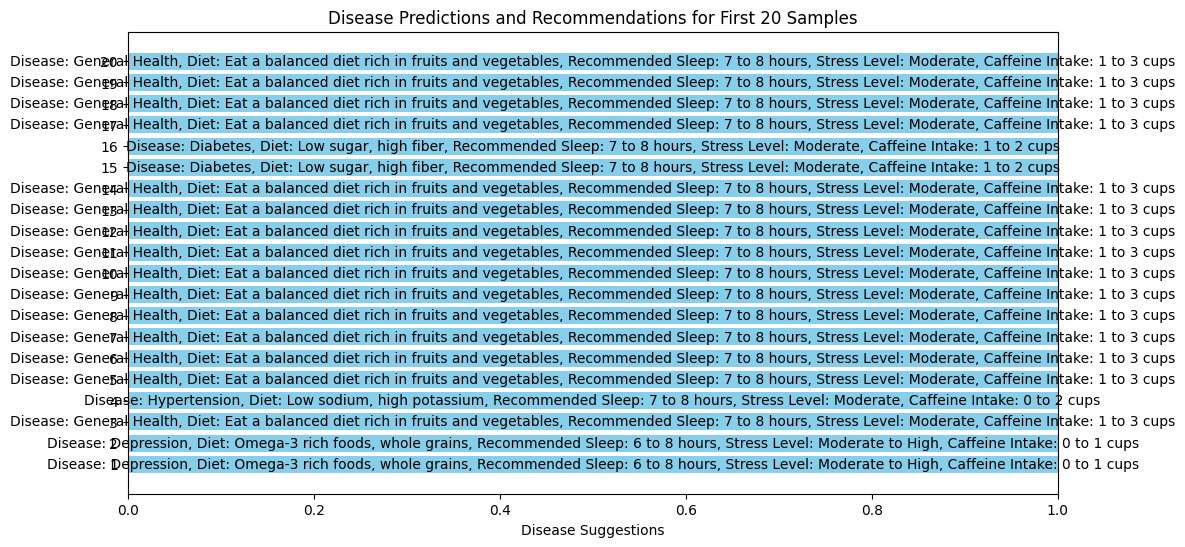

In [ ]:
#############################################################
###############MAIN MODEL TRAINING CODE###########################
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (adjust file path accordingly)
data = pd.read_csv('/content/training_data.csv')

# Step 1: Select relevant columns based on common diseases
common_symptoms = [
    'itching',
    'skin_rash',
    'nodal_skin_eruptions',
    'continuous_sneezing',
    'shivering',
    'joint_pain',
    'stomach_pain',
    'vomiting',
    'fatigue',
    'weight_gain',
    'anxiety',
    'high_fever',
    'yellowish_skin',
    'dark_urine',
    'nausea',
    'diarrhoea',
    'yellow_urine',
    'dehydration',
    'muscle_pain',
    'headache',
    'constipation',
]

# Filter the dataset to include only the relevant columns
data = data[common_symptoms + ['prognosis']]

# Step 2: Check for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 3: Encode all non-numeric columns (including 'prognosis' and others)
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Step 4: Print the unique encoded values of 'prognosis'
print("Encoded 'prognosis' values:", data['prognosis'].unique())

# Step 5: Calculate correlation (only between numeric columns)
correlation_matrix = data.corr()
print("Correlation with prognosis:")
print(correlation_matrix['prognosis'].sort_values(ascending=False))

# Step 6: Split data into features (X) and target (y)
X = data.drop(columns=['prognosis'])  # Features (assuming prognosis is the target)
y = data['prognosis']  # Target (encoded prognosis)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 8: Initialize and train the model (DecisionTreeClassifier)
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 9: Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Step 10: Evaluate the DecisionTree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion matrix for DecisionTree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_tree)

# Step 11: Initialize and train RandomForest model with hyperparameter tuning
rf_model = RandomForestClassifier(
    n_estimators=50,       # Number of trees in the forest
    max_depth=5,           # Limit tree depth
    min_samples_split=5,   # Min samples required to split a node
    min_samples_leaf=2,    # Min samples required at each leaf node
    random_state=42        # Seed for reproducibility
)

# Cross-validation to evaluate RandomForest model performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\nCross-validated accuracy (RandomForest): {cv_scores.mean():.2f}")

# Train and evaluate the RandomForest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# RandomForest accuracy evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandomForest Accuracy: {accuracy_rf * 100:.2f}%")
print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandomForest Confusion Matrix:")
print(conf_matrix_rf)

# Step 12: Disease suggestions based on the predicted prognosis
disease_suggestions = {
    0: {"disease": "Anxiety", "diet": "Balanced diet, avoid processed food", "sleep": (7, 9), "stress_level": "Low", "caffeine_intake": (0, 1)},
    1: {"disease": "Hypertension", "diet": "Low sodium, high potassium", "sleep": (7, 8), "stress_level": "Moderate", "caffeine_intake": (0, 2)},
    2: {"disease": "Depression", "diet": "Omega-3 rich foods, whole grains", "sleep": (6, 8), "stress_level": "Moderate to High", "caffeine_intake": (0, 1)},
    3: {"disease": "Diabetes", "diet": "Low sugar, high fiber", "sleep": (7, 8), "stress_level": "Moderate", "caffeine_intake": (1, 2)},
    4: {"disease": "Heart Disease", "diet": "Low fat, high fiber, vegetables", "sleep": (7, 8), "stress_level": "Low", "caffeine_intake": (0, 1)},
    # Add more diseases and suggestions as necessary
}

# Default suggestions for diseases not found in the dictionary
default_suggestion = {
    "disease": "General Health",
    "diet": "Eat a balanced diet rich in fruits and vegetables",
    "sleep": (7, 8),  # Default sleep hours
    "stress_level": "Moderate",
    "caffeine_intake": (1, 3)  # Default caffeine intake
}

# Check unique predictions
unique_predictions = set(y_pred_rf)
print("Unique Predictions:", unique_predictions)  # Check what unique predictions exist

# Function to get suggestions based on predicted disease
def get_suggestions(predicted_disease):
    if predicted_disease in disease_suggestions:
        suggestions = disease_suggestions[predicted_disease]
        return (f"Disease: {suggestions['disease']}, "
                f"Diet: {suggestions['diet']}, "
                f"Recommended Sleep: {suggestions['sleep'][0]} to {suggestions['sleep'][1]} hours, "
                f"Stress Level: {suggestions['stress_level']}, "
                f"Caffeine Intake: {suggestions['caffeine_intake'][0]} to {suggestions['caffeine_intake'][1]} cups")
    else:
        # Return default suggestion if no specific suggestion is available
        return (f"Disease: {default_suggestion['disease']}, "
                f"Diet: {default_suggestion['diet']}, "
                f"Recommended Sleep: {default_suggestion['sleep'][0]} to {default_suggestion['sleep'][1]} hours, "
                f"Stress Level: {default_suggestion['stress_level']}, "
                f"Caffeine Intake: {default_suggestion['caffeine_intake'][0]} to {default_suggestion['caffeine_intake'][1]} cups")

# Store suggestions for visualization
suggestions_list = []
for prediction in y_pred_rf:
    suggestions = get_suggestions(prediction)
    suggestions_list.append(suggestions)

# Visualize the suggestions
sample_range = range(1, 21)  # Display suggestions for first 20 predictions
suggestions_to_display = suggestions_list[:20]  # Limit to first 20 suggestions

# Plotting the suggestions
plt.figure(figsize=(12, 6))
plt.barh(sample_range, [1] * len(suggestions_to_display), color='skyblue')  # Dummy bar for display
for index, suggestion in enumerate(suggestions_to_display):
    plt.text(0.5, index + 1, suggestion, ha='center', va='center', fontsize=10)

plt.yticks(sample_range)
plt.xlabel('Disease Suggestions')
plt.title('Disease Predictions and Recommendations for First 20 Samples')
plt.xlim(0, 1)  # Dummy x limit to keep bar width
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the new dataset
new_data = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')

# Step 1: Select relevant columns from the new dataset
selected_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

new_data = new_data[selected_columns]

# Step 2: Encode categorical variables like 'Gender' and 'Outcome Variable'
label_encoder = LabelEncoder()

# Encode 'Gender' and 'Outcome Variable'
new_data['Gender'] = label_encoder.fit_transform(new_data['Gender'])  # male/female as 0/1
new_data['Outcome Variable'] = label_encoder.fit_transform(new_data['Outcome Variable'])  # prognosis as 0/1

# Step 3: Ensure the new dataset has the same features as the model
# Get the feature names used during training from the model
trained_features = rf_model.feature_names_in_

# If a column is missing in the new dataset, add it and fill with 0
for feature in trained_features:
    if feature not in new_data.columns:
        new_data[feature] = 0

# Remove any columns not present in the trained model's feature set
X_new = new_data[trained_features]

# Step 4: Separate features and labels
y_new = new_data['Outcome Variable']

# Step 5: Test the new data on the pre-trained model
y_pred_new = rf_model.predict(X_new)

# Step 6: Evaluate the model on the new dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_new = accuracy_score(y_new, y_pred_new)
print(f"Accuracy on New Dataset: {accuracy_new * 100:.2f}%")

print("\nClassification Report for New Dataset:")
print(classification_report(y_new, y_pred_new))

print("\nConfusion Matrix for New Dataset:")
print(confusion_matrix(y_new, y_pred_new))


Accuracy on New Dataset: 0.00%

Classification Report for New Dataset:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     163.0
           1       0.00      0.00      0.00     186.0
           7       0.00      0.00      0.00       0.0

    accuracy                           0.00     349.0
   macro avg       0.00      0.00      0.00     349.0
weighted avg       0.00      0.00      0.00     349.0


Confusion Matrix for New Dataset:
[[  0   0 163]
 [  0   0 186]
 [  0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
##############TRAINING WITH ALL ROWS AND IMP COLUMNS######################
##########################################################################
###########################################################################
###########################################################################

In [ ]:
import pandas as pd

# Load the dataset (adjust file path if needed)
data = pd.read_csv('/content/training_data.csv')

# Check the number of rows and columns
num_rows, num_columns = data.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Display the first few rows to understand the dataset
print(data.head())

# Calculate the number of unique values for each column to prioritize based on variability
unique_counts = data.nunique().sort_values(ascending=False)
print("\nUnique values per column (sorted):")
print(unique_counts)

# You can set a threshold for priority; for example, columns with more than 1 unique value might be relevant
high_priority_columns = unique_counts[unique_counts > 1].index.tolist()
print("\nHigh-Priority Columns Based on Unique Value Threshold:")
print(high_priority_columns)

# For more detailed inspection, view column statistics
print("\nSummary statistics of high-priority columns:")
print(data[high_priority_columns].describe())


Total Rows: 4920, Total Columns: 134
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

 

In [ ]:
import pandas as pd

# Load the dataset (adjust file path if needed)
data = pd.read_csv('/content/training_data.csv')

# Check the number of rows and columns
num_rows, num_columns = data.shape
print(f"Total Rows: {num_rows}, Total Columns: {num_columns}")

# Display the first few rows to understand the dataset
print(data.head())

# Calculate the number of unique values for each column to prioritize based on variability
unique_counts = data.nunique().sort_values(ascending=False)
print("\nUnique values per column (sorted):")
print(unique_counts)

# Define a threshold for priority (columns with more than 1 unique value might be relevant)
high_priority_columns = unique_counts[unique_counts > 1].index.tolist()
print("\nHigh-Priority Columns Based on Unique Value Threshold:")
print(high_priority_columns)

# Subset the dataframe to retain only the selected high-priority columns
selected_columns = high_priority_columns
df = data[selected_columns]

# Display the updated dataset info
print("\nUpdated Dataframe Info:")
print(df.info())
print("\nUpdated Dataset Head:")
print(df.head())

# Generate Summary Statistics for the Selected Columns
summary_stats = df.describe()
print("\nSummary statistics for selected columns:")
print(summary_stats)

# Display unique value counts for the selected columns
unique_counts_selected = df.nunique()
print("\nUnique values per selected column:")
print(unique_counts_selected)


Total Rows: 4920, Total Columns: 134
   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

 

Non-numeric columns: Index(['prognosis'], dtype='object')
Encoded 'prognosis' values: [15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]
Decision Tree Accuracy: 25.51%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.04      1.00      0.07        48
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00        48
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00        48
           9       0.00      0.00      0.00        48
          10       1.00      1.00      1.00        48
          11       1.00      0.94      0.97        48
          12    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Cross-validated accuracy (RandomForest): 0.82

RandomForest Accuracy: 81.66%

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.83      0.92      0.87        48
           2       0.85      0.94      0.89        48
           3       1.00      0.94      0.97        48
           4       1.00      1.00      1.00        48
           5       0.27      1.00      0.43        48
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        48
           8       1.00      1.00      1.00        48
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        48
          11       1.00      1.00      1.00        48
          12       0.46      0.96      0.63        48
          13       1.00      0.94      0.97        48
          14       0.87      1.00      0.93        48
          15       1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


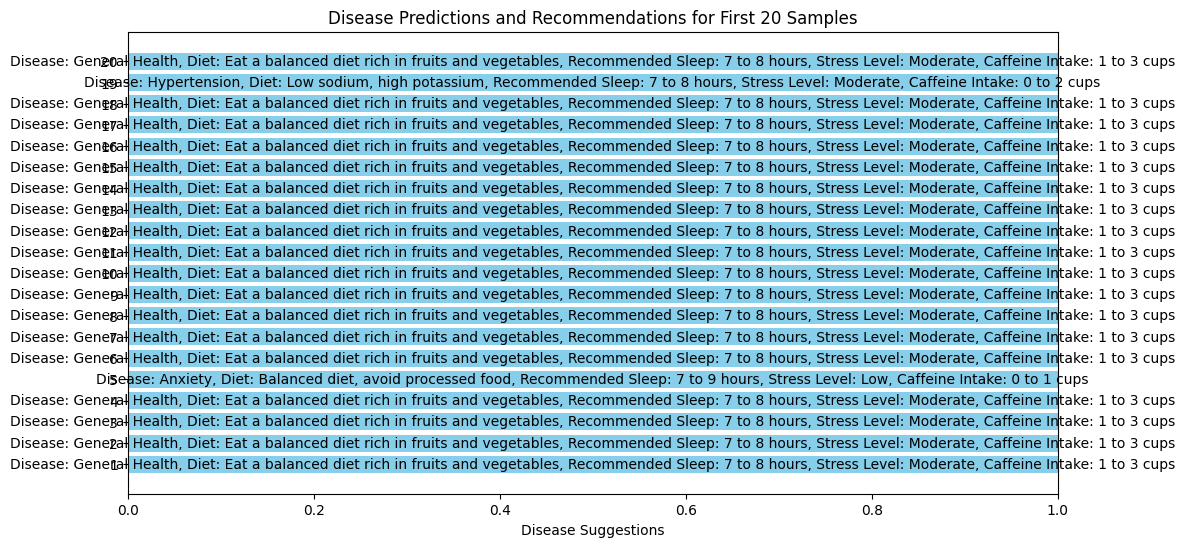

In [ ]:
#############################################################
############### MAIN MODEL TRAINING CODE ###################
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset (adjust file path accordingly)
data = pd.read_csv('/content/training_data.csv')

# Step 1: Select relevant columns based on common diseases
common_symptoms = [
    'itching',
    'skin_rash',
    'nodal_skin_eruptions',
    'continuous_sneezing',
    'shivering',
    'joint_pain',
    'stomach_pain',
    'vomiting',
    'fatigue',
    'weight_gain',
    'anxiety',
    'high_fever',
    'yellowish_skin',
    'dark_urine',
    'nausea',
    'diarrhoea',
    'yellow_urine',
    'dehydration',
    'muscle_pain',
    'headache',
    'constipation',
]

# Filter the dataset to include only the relevant columns
data = data[common_symptoms + ['prognosis']]

# Step 2: Check for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 3: Encode all non-numeric columns (including 'prognosis' and others)
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Step 4: Print the unique encoded values of 'prognosis'
print("Encoded 'prognosis' values:", data['prognosis'].unique())

# Step 5: Split data into features (X) and target (y)
X = data.drop(columns=['prognosis'])  # Features
y = data['prognosis']  # Target (encoded prognosis)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Step 7: Initialize and train the model (DecisionTreeClassifier)
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=2)
decision_tree_model.fit(X_train, y_train)

# Step 8: Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Step 9: Evaluate the DecisionTree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion matrix for DecisionTree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("\nDecision Tree Confusion Matrix:")
print(conf_matrix_tree)

# Step 10: Initialize and train RandomForest model with hyperparameter tuning
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=5,            # Limit tree depth
    min_samples_split=5,    # Min samples required to split a node
    min_samples_leaf=2,     # Min samples required at each leaf node
    random_state=42         # Seed for reproducibility
)

# Cross-validation to evaluate RandomForest model performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\nCross-validated accuracy (RandomForest): {cv_scores.mean():.2f}")

# Train and evaluate the RandomForest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# RandomForest accuracy evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandomForest Accuracy: {accuracy_rf * 100:.2f}%")
print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandomForest Confusion Matrix:")
print(conf_matrix_rf)

# Step 11: Disease suggestions based on the predicted prognosis
disease_suggestions = {
    0: {"disease": "Anxiety", "diet": "Balanced diet, avoid processed food", "sleep": (7, 9), "stress_level": "Low", "caffeine_intake": (0, 1)},
    1: {"disease": "Hypertension", "diet": "Low sodium, high potassium", "sleep": (7, 8), "stress_level": "Moderate", "caffeine_intake": (0, 2)},
    2: {"disease": "Depression", "diet": "Omega-3 rich foods, whole grains", "sleep": (6, 8), "stress_level": "Moderate to High", "caffeine_intake": (0, 1)},
    3: {"disease": "Diabetes", "diet": "Low sugar, high fiber", "sleep": (7, 8), "stress_level": "Moderate", "caffeine_intake": (1, 2)},
    4: {"disease": "Heart Disease", "diet": "Low fat, high fiber, vegetables", "sleep": (7, 8), "stress_level": "Low", "caffeine_intake": (0, 1)},
    # Add more diseases and suggestions as necessary
}

# Default suggestions for diseases not found in the dictionary
default_suggestion = {
    "disease": "General Health",
    "diet": "Eat a balanced diet rich in fruits and vegetables",
    "sleep": (7, 8),  # Default sleep hours
    "stress_level": "Moderate",
    "caffeine_intake": (1, 3)  # Default caffeine intake
}

# Check unique predictions
unique_predictions = set(y_pred_rf)
print("Unique Predictions:", unique_predictions)  # Check what unique predictions exist

# Function to get suggestions based on predicted disease
def get_suggestions(predicted_disease):
    if predicted_disease in disease_suggestions:
        suggestions = disease_suggestions[predicted_disease]
        return (f"Disease: {suggestions['disease']}, "
                f"Diet: {suggestions['diet']}, "
                f"Recommended Sleep: {suggestions['sleep'][0]} to {suggestions['sleep'][1]} hours, "
                f"Stress Level: {suggestions['stress_level']}, "
                f"Caffeine Intake: {suggestions['caffeine_intake'][0]} to {suggestions['caffeine_intake'][1]} cups")
    else:
        # Return default suggestion if no specific suggestion is available
        return (f"Disease: {default_suggestion['disease']}, "
                f"Diet: {default_suggestion['diet']}, "
                f"Recommended Sleep: {default_suggestion['sleep'][0]} to {default_suggestion['sleep'][1]} hours, "
                f"Stress Level: {default_suggestion['stress_level']}, "
                f"Caffeine Intake: {default_suggestion['caffeine_intake'][0]} to {default_suggestion['caffeine_intake'][1]} cups")

# Store suggestions for visualization
suggestions_list = []
for prediction in y_pred_rf:
    suggestions = get_suggestions(prediction)
    suggestions_list.append(suggestions)

# Visualize the suggestions
sample_range = range(1, 21)  # Display suggestions for first 20 predictions
suggestions_to_display = suggestions_list[:20]  # Limit to first 20 suggestions

# Plotting the suggestions
plt.figure(figsize=(12, 6))
plt.barh(sample_range, [1] * len(suggestions_to_display), color='skyblue')  # Dummy bar for display
for index, suggestion in enumerate(suggestions_to_display):
    plt.text(0.5, index + 1, suggestion, ha='center', va='center', fontsize=10)

plt.yticks(sample_range)
plt.xlabel('Disease Suggestions')
plt.title('Disease Predictions and Recommendations for First 20 Samples')
plt.xlim(0, 1)  # Dummy x limit to keep bar width
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the new dataset
new_data = pd.read_csv('/content/Disease_symptom_and_patient_profile_dataset.csv')

# Step 1: Select relevant columns from the new dataset
# Adjust columns to match those expected by the model
selected_columns = [
    'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
    'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome'
]
new_data = new_data[selected_columns]

# Rename 'Outcome' to 'Prognosis' to match the model's label
new_data.rename(columns={'Outcome_Variable': 'Prognosis'}, inplace=True)

# Step 2: Handle Missing Values
# Check and fill missing values in the dataset
if new_data.isnull().values.any():
    new_data = new_data.fillna(0)  # Adjust filling method as needed

# Step 3: Encode Categorical Variables ('Gender' and 'Prognosis')
label_encoder_gender = LabelEncoder()
label_encoder_prognosis = LabelEncoder()

# Ensure 'Gender' encoding matches that in the training dataset
if 'Gender' in new_data.columns:
    new_data['Gender'] = label_encoder_gender.fit_transform(new_data['Gender'])

# Ensure 'Prognosis' encoding matches that in the training dataset
if 'Prognosis' in new_data.columns:
    new_data['Prognosis'] = label_encoder_prognosis.fit_transform(new_data['Prognosis'])

# Step 4: Align Features with the Trained Model
trained_features = rf_model.feature_names_in_

# Add missing features as zero columns
for feature in trained_features:
    if feature not in new_data.columns:
        new_data[feature] = 0

# Remove extra columns that are not in the trained model’s features
X_new = new_data[trained_features]

# Separate target variable (Prognosis)
y_new = new_data['Prognosis']

# Step 5: Predict with the Pre-Trained Model
y_pred_new = rf_model.predict(X_new)

# Step 6: Evaluate the Model
accuracy_new = accuracy_score(y_new, y_pred_new)
print(f"Accuracy on New Dataset: {accuracy_new * 100:.2f}%")

print("\nClassification Report for New Dataset:")
print(classification_report(y_new, y_pred_new))

print("\nConfusion Matrix for New Dataset:")
print(confusion_matrix(y_new, y_pred_new))


KeyError: "['Outcome'] not in index"